In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
df = pd.read_csv("/content/summer-products-with-rating-and-performance_2020-08.csv")
df

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,EUR,10000,1,4.08,1367,722.0,...,5316,4.224605,5b507899ab577736508a0782,0,NaN,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer,2020-08
1569,10 couleurs femmes shorts d'été lacent ceintur...,10 Color Women Summer Shorts Lace Up Elastic W...,2.00,56,EUR,100,1,3.07,28,11.0,...,4435,3.696054,54d83b6b6b8a771e478558de,0,NaN,https://www.wish.com/c/5eccd22b4497b86fd48f16b4,https://contestimg.wish.com/api/webimage/5eccd...,5eccd22b4497b86fd48f16b4,summer,2020-08
1570,Nouveautés Hommes Siwmwear Beach-Shorts Hommes...,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,EUR,100,0,3.71,59,24.0,...,210,3.961905,5b42da1bf64320209fc8da69,0,NaN,https://www.wish.com/c/5e74be96034d613d42b52dfe,https://contestimg.wish.com/api/webimage/5e74b...,5e74be96034d613d42b52dfe,summer,2020-08
1571,Mode femmes d'été sans manches robes col en V ...,Fashion Women Summer Sleeveless Dresses V Neck...,13.00,11,EUR,100,0,2.50,2,0.0,...,31,3.774194,5d56b32c40defd78043d5af9,0,NaN,https://www.wish.com/c/5eda07ab0e295c2097c36590,https://contestimg.wish.com/api/webimage/5eda0...,5eda07ab0e295c2097c36590,summer,2020-08


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [136]:
single_value_columns = df.columns[df.nunique() == 1]
single_value_columns

Index(['currency_buyer', 'has_urgency_banner', 'theme', 'crawl_month'], dtype='object')

In [137]:
df.drop(columns=["currency_buyer","theme","crawl_month","merchant_profile_picture","urgency_text"],inplace=True)

In [138]:
df["has_urgency_banner"] = df["has_urgency_banner"].fillna(0)

In [139]:
df.isnull().sum()

,0
title,0
title_orig,0
price,0
retail_price,0
units_sold,0
uses_ad_boosts,0
rating,0
rating_count,0
rating_five_count,45
rating_four_count,45


In [140]:
df.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1528.000000,1528.000000,1528.000000,1528.000000,...,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1.573000e+03,1573.000000,1573.000000
mean,8.325372,23.288620,4339.005086,0.432931,3.820896,889.659250,442.263743,179.599476,134.549738,63.711387,...,0.012715,33.081373,2.345200,0.002543,40.456453,49.821360,0.300699,2.649583e+04,4.032345,0.143675
std,3.932030,30.357863,9356.539302,0.495639,0.515374,1983.928834,980.203270,400.516231,311.690656,151.343933,...,0.112075,21.353137,1.024371,0.050379,20.301203,2.562799,0.458708,7.847446e+04,0.204768,0.350871
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,6.000000,1.000000,0.000000,0.000000e+00,2.333333,0.000000
25%,5.810000,7.000000,100.000000,0.000000,3.550000,24.000000,12.000000,5.000000,4.000000,2.000000,...,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,0.000000,1.987000e+03,3.917353,0.000000
50%,8.000000,10.000000,1000.000000,0.000000,3.850000,150.000000,79.000000,31.500000,24.000000,11.000000,...,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,0.000000,7.936000e+03,4.040650,0.000000
75%,11.000000,26.000000,5000.000000,1.000000,4.110000,855.000000,413.500000,168.250000,129.250000,62.000000,...,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.000000,2.456400e+04,4.161797,0.000000
max,49.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,11548.000000,4152.000000,3658.000000,2003.000000,...,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.000000,2.174765e+06,5.000000,1.000000


In [141]:
df["rating_five_count"] = df["rating_five_count"] . fillna(df["rating_five_count"].median())

In [142]:
df["rating_four_count"] = df["rating_four_count"] . fillna(df["rating_four_count"].median())

In [143]:
df["rating_three_count"] = df["rating_three_count"] . fillna(df["rating_three_count"].median())

In [144]:
df["rating_two_count"] = df["rating_two_count"] . fillna(df["rating_two_count"].median())

In [145]:
df["rating_one_count"] = df["rating_one_count"] . fillna(df["rating_one_count"].median())

In [146]:
df["product_color"] = df["product_color"] . fillna(df["product_color"].mode()[0])

In [151]:
df["product_variation_size_id"] = df["product_variation_size_id"].replace({
    "1 pc.": "1pc",
    "04-3XL": "4-3XL",
    "L.": "L",
    "SizeL": "L",
    "M.": "M",
    "s": "S",
    "S.": "S",
    "S..": "S",
    "Size S": "S",
    "size S": "S",
    "Size S.": "S",
    "Size-S": "S",
    "Size/S": "S",
    "SIZE XS": "XS",
    "Size-XS": "XS",
    "XS.": "XS",
    "SIZE XXS": "XXS",
    "size XXS": "XXS",
    "SIZE-XXS": "XXS",
    "Size-XXS": "XXS",
    "SIZE-4X": "4X",
    "Size-5X": "5X",
    "X L": "XL",
    "XXL": "2XL",
    "XXXL": "3XL",
    "XXXXL": "4XL",
    "XXXXXL": "5XL",
    "XXS": "2XS",
    "XXXS": "3XS",
    "SIZEXXS" : "2XS",
    "SIZEL" : "L",
    "SIZES" : "S",
    "SIZE5XL" : "XL",
    "XXS" : "2XS",
    "SIZE4XL" : "4XL",
    "43XL" : "4-3XL"
})

In [148]:
df["product_variation_size_id"] = df["product_variation_size_id"].str.strip().str.upper()

In [149]:
df["product_variation_size_id"] = df["product_variation_size_id"].str.replace(r"[^\w\d]", "", regex=True)

In [152]:
print(df["product_variation_size_id"].unique())

['M' 'XS' 'S' '2XS' 'L' '2XL' nan 'CHOOSEASIZE' '32L' 'SUITS' '5XL' 'EU35'
 '4' '1MBY3M' '3XL' 'XL' 'WOMENSIZE36' 'US65EU37' '3XS'
 '26WAIST72CM28INCH' '29' '1PC' '100CM' 'ONESIZE' '4XL' '1' 'SMCHILD'
 '2PCS' '30CM' '33' 'SIZEM' '100X100CM393X393INCH' '100PCS'
 'BASETOPMATTETOPCOAT' '35' '34' 'SBUST88CM' 'SWAIST5862CM' 'SPINKBLACK'
 '20PCS' 'USS' 'WHITE' '25' 'ROUND' 'PACKOF1' 'SDIAMETER30CM' '6XL'
 'AUPLUGLOWQUALITY' '5PAIRS' '25S' 'SPINK' 'DAUGHTER24M' '2'
 'BABYFLOATBOAT' '10ML' '60' 'US55EU35' '10PCS' '17' 'WOMENSIZE37'
 '3LAYEREDANKLET' '45YEARS' 'FIRSTGENERATION' '80X200CM' 'EU39US8'
 'BASECOAT' '36' '4-3XL' 'PANTSS' 'FLOATINGCHAIRFORKID' '20PCS10PAIRS' 'B'
 '5' '1PCXL' 'H01' '40CM']


In [153]:
df["product_variation_size_id"] = df["product_variation_size_id"] . fillna(df["product_variation_size_id"].mode()[0])

In [154]:
df["origin_country"] = df["origin_country"] . fillna(df["origin_country"].mode()[0])

In [155]:
df["merchant_name"] = df["merchant_name"].astype(str)
def is_english(text):
    if not isinstance(text, str):
        return False
    return bool(re.match("^[a-zA-Z0-9\s\.,'&\-]+$", text))
df["merchant_name_clean"] = df["merchant_name"].apply(lambda x: x if is_english(x) else None)

In [156]:
df["merchant_name_clean"] = df["merchant_name_clean"] . fillna(df["merchant_name_clean"].mode()[0])

In [157]:
df.dtypes

,0
title,object
title_orig,object
price,float64
retail_price,int64
units_sold,int64
uses_ad_boosts,int64
rating,float64
rating_count,int64
rating_five_count,float64
rating_four_count,float64


In [158]:
df.drop(columns=["merchant_name"],inplace=True)

In [159]:
import unicodedata
def normalize_text(text):
    if pd.isna(text):
        return ""
    text = str(text)
    text = unicodedata.normalize("NFKC", text)
    text = text.replace("\u00A0", " ").replace("\u200f", "")\
               .replace("\u200e", "")
    text = "".join(c for c in text if unicodedata.category(c)[0] != "C")
    return text.strip()

def is_english(text):
    if pd.isna(text):
        return False
    text = normalize_text(text)
    if not text:
        return False
    return bool(re.fullmatch(r"[A-Za-z0-9\s\.,'&\-\(\)%]+", text))

df["merchant_info_subtitle_clean"] = df["merchant_info_subtitle"].apply(
    lambda x: x if is_english(x) else None
)

df["merchant_info_subtitle"] = df["merchant_info_subtitle"].astype(str)
def is_english(text):
    if not isinstance(text, str):
        return False
    return bool(re.match("^[a-zA-Z0-9\s\.,'&\-]+$", text))
df["merchant_info_subtitle_clean"] = df["merchant_info_subtitle"].apply(lambda x: x if is_english(x) else None)

In [160]:
df.drop(columns=["merchant_info_subtitle"],inplace=True)

In [184]:
df["merchant_info_subtitle_clean"] = df["merchant_info_subtitle_clean"] . fillna(df["merchant_info_subtitle_clean"].mode()[0])

In [185]:
df.isnull().sum()

,0
title,0
title_orig,0
price,0
retail_price,0
units_sold,0
uses_ad_boosts,0
rating,0
rating_count,0
rating_five_count,0
rating_four_count,0


mode_series = df["merchant_info_subtitle_clean"].mode()
if not mode_series.empty:
    df["merchant_info_subtitle_clean"].fillna(mode_series[0], inplace=True)

In [162]:
df["shipping_option_name"] = df["shipping_option_name"].astype(str)
def is_english(text):
    if not isinstance(text, str):
        return False
    return bool(re.match("^[a-zA-Z0-9\s\.,'&\-]+$", text))
df["shipping_option_name_clean"] = df["shipping_option_name"].apply(lambda x: x if is_english(x) else None)

In [163]:
df.drop(columns=["shipping_option_name"],inplace=True)

In [164]:
df["shipping_option_name_clean"] = df["shipping_option_name_clean"] . fillna(df["shipping_option_name_clean"].mode()[0])

In [165]:
df.isnull().sum()

,0
title,0
title_orig,0
price,0
retail_price,0
units_sold,0
uses_ad_boosts,0
rating,0
rating_count,0
rating_five_count,0
rating_four_count,0


In [186]:
df.duplicated().sum()

np.int64(0)

In [187]:
df.drop_duplicates(inplace=True)

In [168]:
df.duplicated().sum()

np.int64(0)

In [169]:
df.dtypes

,0
title,object
title_orig,object
price,float64
retail_price,int64
units_sold,int64
uses_ad_boosts,int64
rating,float64
rating_count,int64
rating_five_count,float64
rating_four_count,float64


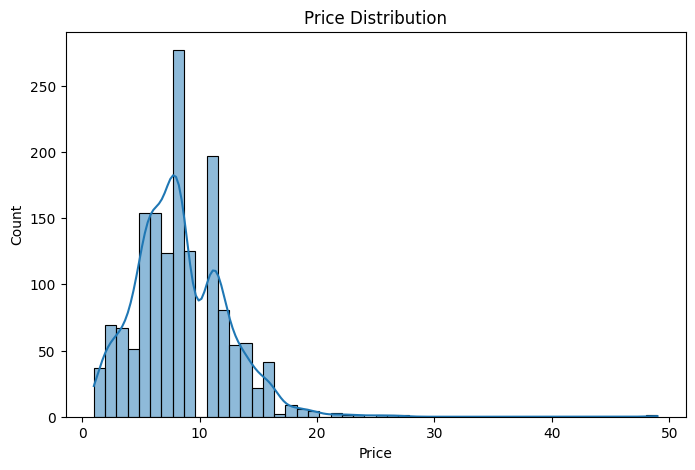

In [188]:
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

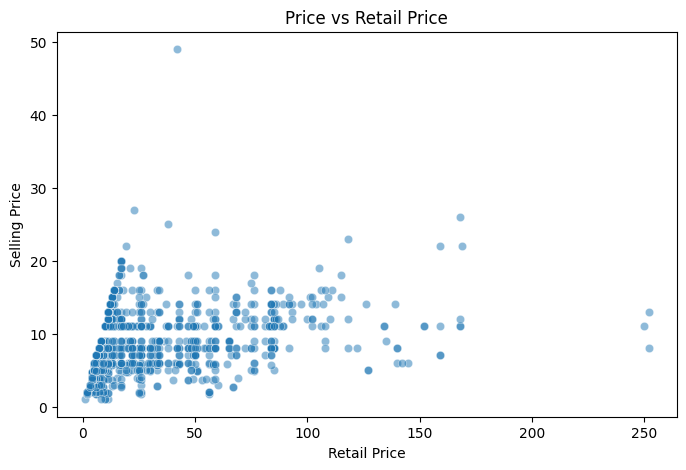

In [189]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='retail_price', y='price', alpha=0.5)
plt.title('Price vs Retail Price')
plt.xlabel('Retail Price')
plt.ylabel('Selling Price')
plt.show()

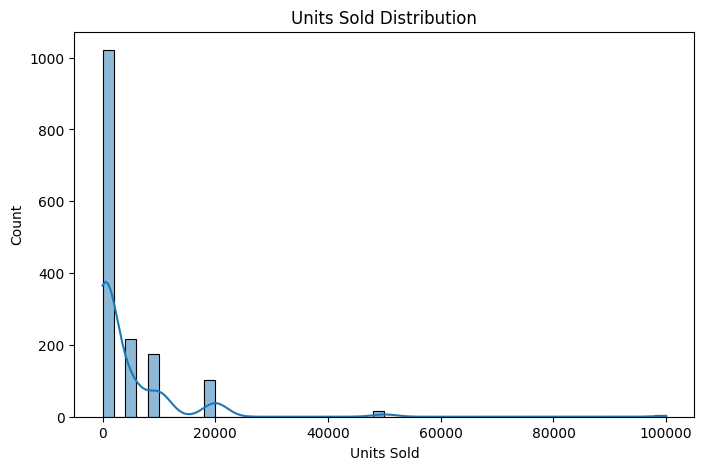

In [190]:
plt.figure(figsize=(8, 5))
sns.histplot(df['units_sold'], bins=50, kde=True)
plt.title('Units Sold Distribution')
plt.xlabel('Units Sold')
plt.ylabel('Count')
plt.show()

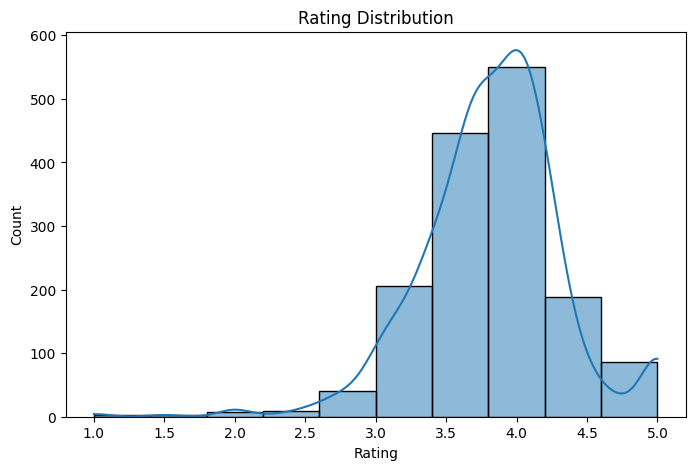

In [191]:
plt.figure(figsize=(8, 5))
sns.histplot(df['rating'], bins=10, kde=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

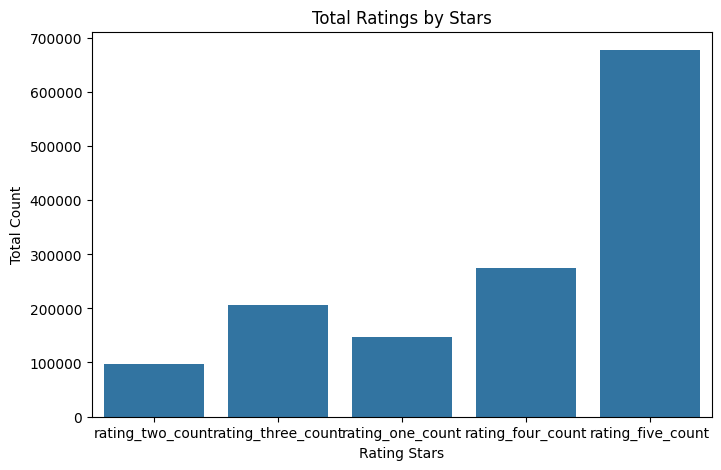

In [192]:
rating_cols = ['rating_five_count', 'rating_four_count', 'rating_three_count', 'rating_two_count', 'rating_one_count']
rating_counts = df[rating_cols].sum().sort_index(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.title('Total Ratings by Stars')
plt.xlabel('Rating Stars')
plt.ylabel('Total Count')
plt.show()

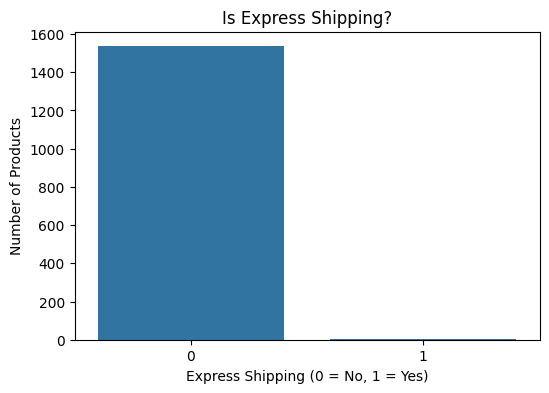

In [193]:
plt.figure(figsize=(6, 4))
sns.countplot(x='shipping_is_express', data=df)
plt.title('Is Express Shipping?')
plt.xlabel('Express Shipping (0 = No, 1 = Yes)')
plt.ylabel('Number of Products')
plt.show()

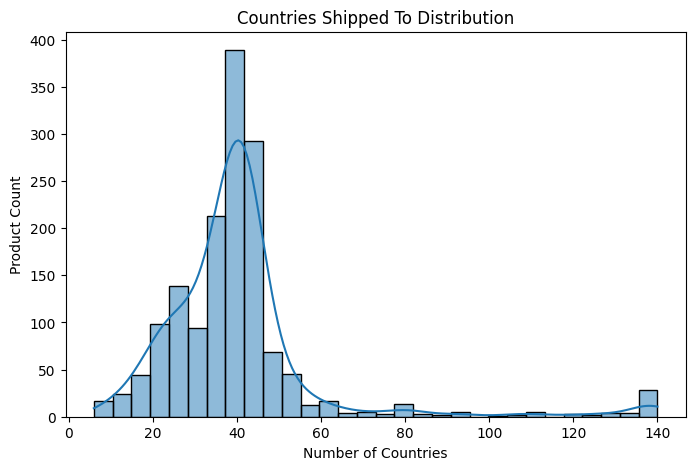

In [194]:
plt.figure(figsize=(8, 5))
sns.histplot(df['countries_shipped_to'], bins=30, kde=True)
plt.title('Countries Shipped To Distribution')
plt.xlabel('Number of Countries')
plt.ylabel('Product Count')
plt.show()

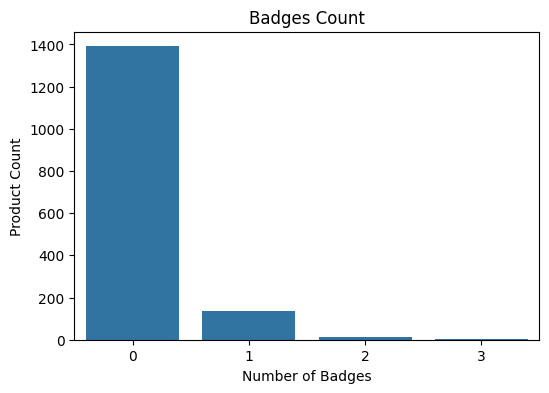

In [195]:
plt.figure(figsize=(6, 4))
sns.countplot(x='badges_count', data=df)
plt.title('Badges Count')
plt.xlabel('Number of Badges')
plt.ylabel('Product Count')
plt.show()

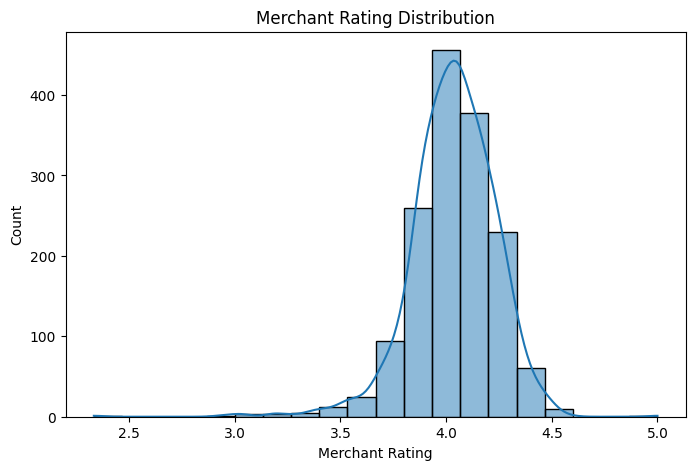

In [196]:
plt.figure(figsize=(8, 5))
sns.histplot(df['merchant_rating'], bins=20, kde=True)
plt.title('Merchant Rating Distribution')
plt.xlabel('Merchant Rating')
plt.ylabel('Count')
plt.show()

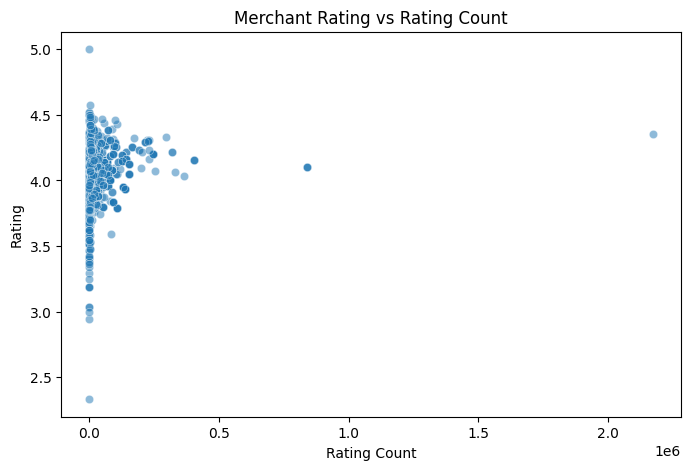

In [197]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='merchant_rating_count', y='merchant_rating', alpha=0.5)
plt.title('Merchant Rating vs Rating Count')
plt.xlabel('Rating Count')
plt.ylabel('Rating')
plt.show()

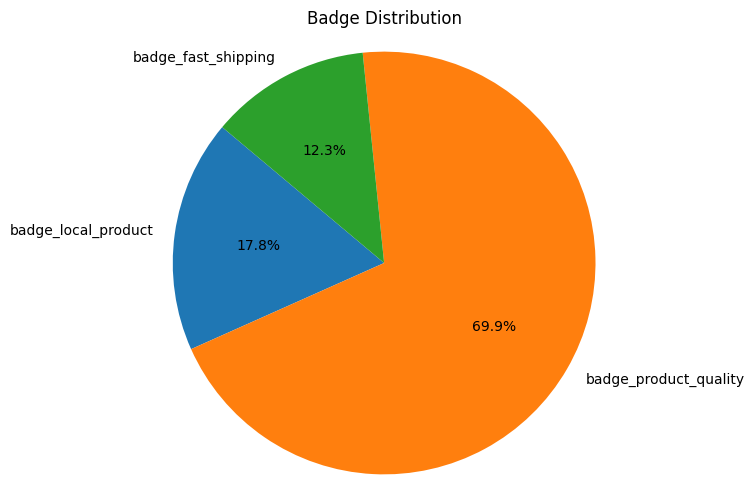

In [198]:
badges = ['badge_local_product', 'badge_product_quality', 'badge_fast_shipping']
badge_sums = df[badges].sum()
plt.figure(figsize=(6, 6))
plt.pie(badge_sums, labels=badge_sums.index, autopct='%1.1f%%', startangle=140)
plt.title('Badge Distribution')
plt.axis('equal')
plt.show()

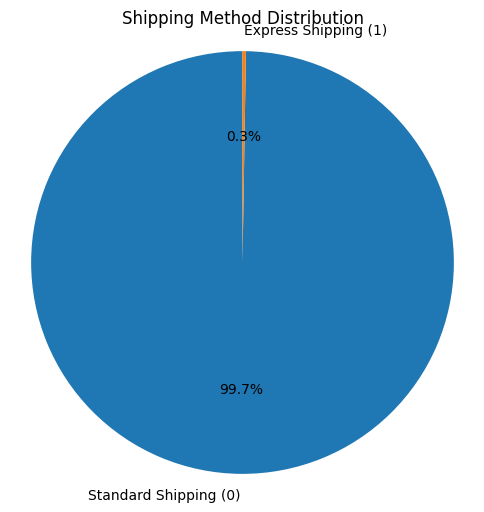

In [199]:
shipping_counts = df['shipping_is_express'].value_counts()
labels = ['Standard Shipping (0)', 'Express Shipping (1)']
plt.figure(figsize=(6, 6))
plt.pie(shipping_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Shipping Method Distribution')
plt.axis('equal')
plt.show()

In [200]:
df.to_csv("SUMMER-products-Cleaned.csv", index=False)